# Extracting word frequency from book

aim: visualize the word frequency distributions of any novel that you can find on Project Gutenberg.

In [1]:
# Importing requests, BeautifulSoup and nltk
import requests
from bs4 import BeautifulSoup
import nltk



## 1) Download a book i.e. moby dick

In [2]:
# Getting the Moby Dick HTML 
r = requests.get('https://s3.amazonaws.com/assets.datacamp.com/production/project_147/datasets/2701-h.htm')

# Setting the correct text encoding of the HTML page
r.encoding = 'utf-8'

# Extracting the HTML from the request object
html = r.text

# Printing the first 2000 characters in html
print(html[:2000])

<?xml version="1.0" encoding="utf-8"?>

<!DOCTYPE html
   PUBLIC "-//W3C//DTD XHTML 1.0 Strict//EN"
   "http://www.w3.org/TR/xhtml1/DTD/xhtml1-strict.dtd" >

<html xmlns="http://www.w3.org/1999/xhtml" lang="en">
  <head>
    <title>
      Moby Dick; Or the Whale, by Herman Melville
    </title>
    <style type="text/css" xml:space="preserve">

    body { background:#faebd0; color:black; margin-left:15%; margin-right:15%; text-align:justify }
    P { text-indent: 1em; margin-top: .25em; margin-bottom: .25em; }
    H1,H2,H3,H4,H5,H6 { text-align: center; margin-left: 15%; margin-right: 15%; }
    hr  { width: 50%; text-align: center;}
    .foot { margin-left: 20%; margin-right: 20%; text-align: justify; text-indent: -3em; font-size: 90%; }
    blockquote {font-size: 100%; margin-left: 0%; margin-right: 0%;}
    .mynote    {background-color: #DDE; color: #000; padding: .5em; margin-left: 10%; margin-right: 10%; font-family: sans-serif; font-size: 95%;}
    .toc       { margin-left: 10%; m

# 2) Get the text from the HTML

wrangle this HTML to extract the text of the novel

In [3]:


# Creating a BeautifulSoup object from the HTML
soup = BeautifulSoup(html)

# Getting the text out of the soup
text = soup.get_text()

# Printing out text between characters 32000 and 34000
print(text[32000: 34000])

t me
      from deliberately stepping into the street, and methodically knocking
      people’s hats off—then, I account it high time to get to sea as soon
      as I can. This is my substitute for pistol and ball. With a philosophical
      flourish Cato throws himself upon his sword; I quietly take to the ship.
      There is nothing surprising in this. If they but knew it, almost all men
      in their degree, some time or other, cherish very nearly the same feelings
      towards the ocean with me.
    

      There now is your insular city of the Manhattoes, belted round by wharves
      as Indian isles by coral reefs—commerce surrounds it with her surf.
      Right and left, the streets take you waterward. Its extreme downtown is
      the battery, where that noble mole is washed by waves, and cooled by
      breezes, which a few hours previous were out of sight of land. Look at the
      crowds of water-gazers there.
    

      Circumambulate the city of a dreamy Sabbath aftern

# 3) Extract the words

tokenizing the text, that is, remove everything that isn't a word (whitespace, punctuation, etc.) and then split the text into a list of words.

In [5]:
# Creating a tokenizer
tokenizer = nltk.tokenize.RegexpTokenizer('\w+')

# Tokenizing the text
tokens = tokenizer.tokenize(text)

# Printing out the first 8 words / tokens 
print(tokens[:8])

['Moby', 'Dick', 'Or', 'the', 'Whale', 'by', 'Herman', 'Melville']


In [6]:
#Make words lowercase
# A new list to hold the lowercased words
words = []

# Looping through the tokens and make them lower case
for word in tokens:
    words.append(word.lower())

# Printing out the first 8 words / tokens 
print(words[:8])

['moby', 'dick', 'or', 'the', 'whale', 'by', 'herman', 'melville']


# 4) Remove stop words

In [8]:
#'the', 'of' and 'a' because they're not so interesting. Such words are known as stop words
import nltk
nltk.download('stopwords')

# Getting the English stop words from nltk
sw = nltk.corpus.stopwords.words('english')

# Printing out the first eight stop words
print(sw[:8])

[nltk_data] Downloading package stopwords to /home/dan/nltk_data...


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves']


[nltk_data]   Unzipping corpora/stopwords.zip.


In [9]:
# A new list to hold Moby Dick with No Stop words
words_ns = []

# Appending to words_ns all words that are in words but not in sw
for word in words:
    if word not in sw:
        words_ns.append(word)

# Printing the first 5 words_ns to check that stop words are gone
print(words_ns[:5])

['moby', 'dick', 'whale', 'herman', 'melville']


# 5) visualise

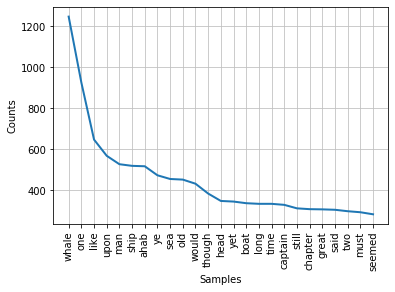

In [10]:
# This command display figures inline
%matplotlib inline

# Creating the word frequency distribution
freqdist = nltk.FreqDist(words_ns)

# Plotting the word frequency distribution
freqdist.plot(25)


In [11]:
# What's the most common word in Moby Dick?
most_common_word = 'whale'